In [42]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import ee
from sql2gee import SQL2GEE
ee.Initialize()

## Vettori

In [3]:
countries = ee.FeatureCollection('ft:1ZDEMjtnWm_smu7l_z3fx91BbxyCRzP2A3cEMrEiP')

In [7]:
sql = 'select * from "ft:1ZDEMjtnWm_smu7l_z3fx91BbxyCRzP2A3cEMrEiP" LIMIT 1'
q = SQL2GEE(sql)
# q.response

In [9]:
sql1 = 'SELECT FIRST(name) from "ft:1ZDEMjtnWm_smu7l_z3fx91BbxyCRzP2A3cEMrEiP"'
q1 = SQL2GEE(sql1)
q1.response

u'Zambia'

In [10]:
sql2 = 'SELECT COUNT(name) from "ft:1ZDEMjtnWm_smu7l_z3fx91BbxyCRzP2A3cEMrEiP"'
q2 = SQL2GEE(sql2)
q2.response

76

In [15]:
sql3 = 'SELECT * from "ft:1ZDEMjtnWm_smu7l_z3fx91BbxyCRzP2A3cEMrEiP" WHERE name = Nigeria'
q3 = SQL2GEE(sql3)
#q3.response

In [17]:
sql4 = 'SELECT FIRST(url) from "ft:1qpKIcYQMBsXLA9RLWCaV9D0Hus2cMQHhI-ViKHo" WHERE height >= 500'
q4 = SQL2GEE(sql4)
q4.response

u'http://mw2.google.com/mw-panoramio/photos/medium/1529603.jpg'

## Rasters

In [19]:
sql5 = 'SELECT ST_METADATA(rast) from "projects/fao-wapor/AGBP_Annual/AGBP-2016"'
q5 = SQL2GEE(sql5)
q5.response

{u'system:asset_size': 4146523356L,
 u'system:footprint': {u'coordinates': [[11.562360516350003,
    -46.75781638473688],
   [19.355512295139672, -46.757816388369086],
   [32.34409871047618, -46.75781640862508],
   [45.70378771462102, -46.7578163924676],
   [65.0043798806843, -46.75781108593152],
   [65.0046815570808, 51.16406073435814],
   [48.67260743031336, 51.164066407911946],
   [38.281738235297865, 51.16406640311927],
   [21.953229579369797, 51.16406642236249],
   [11.191258077987653, 51.16406642404705],
   [-1.0551235073045255, 51.16406641569705],
   [-14.41481236526849, 51.16406641875433],
   [-30.00468169822897, 51.16406073295674],
   [-30.004379812365155, -46.75781106765742],
   [-13.30150495737998, -46.757816431790744],
   [-1.4262259378607551, -46.75781637973961],
   [11.562360516350003, -46.75781638473688]],
  u'type': u'LinearRing'},
 u'system:time_end': 1483142400000.0,
 u'system:time_start': 1451606400000.0}

In [20]:
for band in q5._band_names:
     print(band)

b1_sum


In [23]:
sql6 = 'SELECT ST_BANDMETADATA(rast,b1_sum) from "projects/fao-wapor/AGBP_Annual/AGBP-2016"'
q6 = SQL2GEE(sql6)
q6.response

{u'crs': u'EPSG:4326',
 u'crs_transform': [0.002232142857,
  0.0,
  -30.002232140937,
  0.0,
  -0.002232142857,
  51.162946425297],
 u'data_type': {u'precision': u'double', u'type': u'PixelType'},
 u'dimensions': [42562, 43868],
 u'id': u'b1_sum'}

In [24]:
sql7 = 'SELECT ST_SUMMARYSTATS() from "projects/fao-wapor/AGBP_Annual/AGBP-2016"'
q7 = SQL2GEE(sql7)
q7.response

{u'b1_sum': {'count': 3255846,
  'max': 33106.16698375,
  'mean': 5121.756301124844,
  'min': 0.0,
  'stdev': 6662.236077820174,
  'sum': 16633434342.453007}}

In [27]:
sql8 = "SELECT ST_HISTOGRAM(rast,b1_sum, auto, true) FROM 'projects/fao-wapor/AGBP_Annual/AGBP-2016'"
q8 = SQL2GEE(sql8)
#q8.response

In [37]:
gstore = "http://staging-api.globalforestwatch.org/geostore/4531cca6a8ddcf01bccf302b3dd7ae3f"
r = requests.get(gstore)
j = r.json()
j = j.get('data').get('attributes').get('geojson')

sql9 = "SELECT ST_SUMMARYSTATS() FROM srtm90_v4"
q9 = SQL2GEE(sql9, geojson=j)
q9

In [32]:
sql10 = ''.join(["SELECT ST_SUMMARYSTATS() FROM 'srtm90_v4'",
                "WHERE ST_INTERSECTS(ST_SetSRID(ST_GeomFromGeoJSON(",
                '{"type":"Polygon",',
                 '"coordinates":[[[-43.39599609375,-4.740675384778361],'
                 '[-43.39599609375,-4.959615024698014],'
                 '[-43.17626953125,-4.806364708499984],'
                 '[-43.39599609375,-4.740675384778361]]]}'
                 "),4326), the_geom)"])
print(sql10)

SELECT ST_SUMMARYSTATS() FROM 'srtm90_v4'WHERE ST_INTERSECTS(ST_SetSRID(ST_GeomFromGeoJSON({"type":"Polygon","coordinates":[[[-43.39599609375,-4.740675384778361],[-43.39599609375,-4.959615024698014],[-43.17626953125,-4.806364708499984],[-43.39599609375,-4.740675384778361]]]}),4326), the_geom)


In [40]:
sql11 = 'SELECT ST_HISTOGRAM(raster, lossyear, 15, true) FROM "UMD/hansen/global_forest_change_2015"'
q11 = SQL2GEE(sql11)
response_ret = q11.response

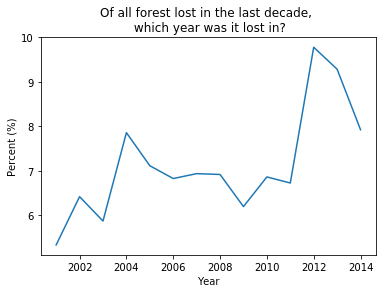

In [43]:
bin_pos = []
counts = []
for pair in response_ret['lossyear']:
    bin_left, count = pair
    bin_pos.append(bin_left)
    counts.append(count)
bin_pos = np.array(bin_pos)
counts = np.array(counts)

percent_value = (counts[1:]/sum(counts[1:])*100.)
year = bin_pos[1:]+2000

plt.plot(year, percent_value)
plt.title('Of all forest lost in the last decade, \n which year was it lost in?')
plt.xlabel('Year')
plt.ylabel("Percent (%)")
plt.show()